In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("layoffs.csv")

In [3]:
df.head()

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,TuSimple,San Diego,Transportation,350.0,0.25,2022-12-21,https://techcrunch.com/2022/12/21/self-driving...,648.0,IPO,2022-12-18 04:12:29,United States,Unknown
1,Lendis,Berlin,Other,NaN,0.50,2022-12-21,https://www.linkedin.com/posts/s-papadopoulos_...,90.0,Series A,2022-12-21 17:05:05,Germany,Unknown
2,Briza,Toronto,Finance,26.0,0.40,2022-12-20,https://betakit.com/ceo-of-briza-steps-down-as...,10.0,Series A,2022-12-20 18:43:01,Canada,https://docs.google.com/spreadsheets/d/18ZMnL9...
3,Zhihu,Beijing,Consumer,NaN,0.10,2022-12-20,https://pandaily.com/chinese-qa-platform-zhihu...,892.0,Series F,2022-12-21 17:06:02,China,Unknown
4,Health IQ,SF Bay Area,Healthcare,NaN,NaN,2022-12-19,https://www.coverager.com/layoffs-at-health-iq/,136.0,Series D,2022-12-24 04:15:01,United States,Unknown


In [4]:
num_df = pd.DataFrame(df.isna().sum(),columns=['#NaN'])
num_df.style.apply(lambda x: ["color: turquoise; background: black" if v > 0 else "" for v in df.isna().sum()])

,#NaN
Company,0
Location,0
Industry,0
Laid_Off_Count,559
Percentage,600
Date,1
Source,0
Funds_Raised,137
Stage,0
Date_Added,0


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date_Added'] = pd.to_datetime(df['Date_Added'])

In [6]:
df[df['Date'].isna()].loc[:,"Date_Added"].tolist()

[Timestamp('2022-12-03 05:20:31')]

In [7]:
df.loc[df['Date'].isna(),"Date"] = df[df['Date'].isna()].loc[:,"Date_Added"]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1841 entries, 0 to 1840
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Company                     1841 non-null   object        
 1   Location                    1841 non-null   object        
 2   Industry                    1841 non-null   object        
 3   Laid_Off_Count              1282 non-null   float64       
 4   Percentage                  1241 non-null   float64       
 5   Date                        1841 non-null   datetime64[ns]
 6   Source                      1841 non-null   object        
 7   Funds_Raised                1704 non-null   float64       
 8   Stage                       1841 non-null   object        
 9   Date_Added                  1841 non-null   datetime64[ns]
 10  Country                     1841 non-null   object        
 11  List_of_Employees_Laid_Off  1841 non-null   object      

In [9]:
df.describe(include="all")

/tmp/ipykernel_78941/1985922364.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")
/tmp/ipykernel_78941/1985922364.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
count,1841,1841,1841,1282.000000,1241.000000,1841,1841,1704.000000,1841,1841,1841,1841
unique,1530,164,28,NaN,NaN,419,1658,NaN,15,1802,56,93
top,OYO,SF Bay Area,Finance,NaN,NaN,2020-04-02 00:00:00,Internal memo,NaN,Unknown,2020-03-28 20:52:49,United States,Unknown
freq,5,485,231,NaN,NaN,27,77,NaN,318,40,1209,1748
first,NaN,NaN,NaN,NaN,NaN,2020-03-11 00:00:00,NaN,NaN,NaN,2020-03-28 20:52:49,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2022-12-21 00:00:00,NaN,NaN,NaN,2022-12-24 04:15:01,NaN,NaN
mean,NaN,NaN,NaN,193.769111,0.271988,NaN,NaN,848.801817,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,556.172347,0.263107,NaN,NaN,6207.645051,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,3.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,31.250000,0.100000,NaN,NaN,45.000000,NaN,NaN,NaN,NaN


<AxesSubplot: title={'center': 'Layoffs by Year'}, ylabel='count'>

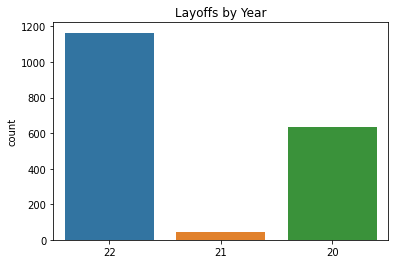

In [10]:
import matplotlib.pyplot as plt
plt.title("Layoffs by Year")
sns.countplot(x=[d.strftime('%y') for d in df['Date']])

Text(0.5, 0, '')

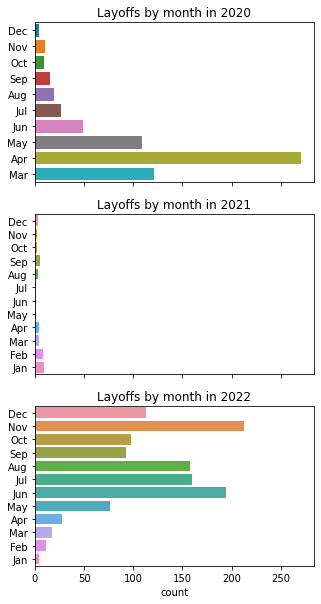

In [11]:
fig,ax = plt.subplots(3,1,figsize=(5,10),sharex='col')

for i,x in df.groupby(by=[d.year for d in df['Date']]):
    ax[i-2020].set_title(f"Layoffs by month in {i}")
    sns.countplot(y=[d.strftime('%b') for d in x['Date']],ax=ax[i-2020])
ax[0].set_xlabel("")
ax[1].set_xlabel("")
    

<AxesSubplot: title={'center': 'Layoffs by Industry'}, xlabel='count', ylabel='Industry'>

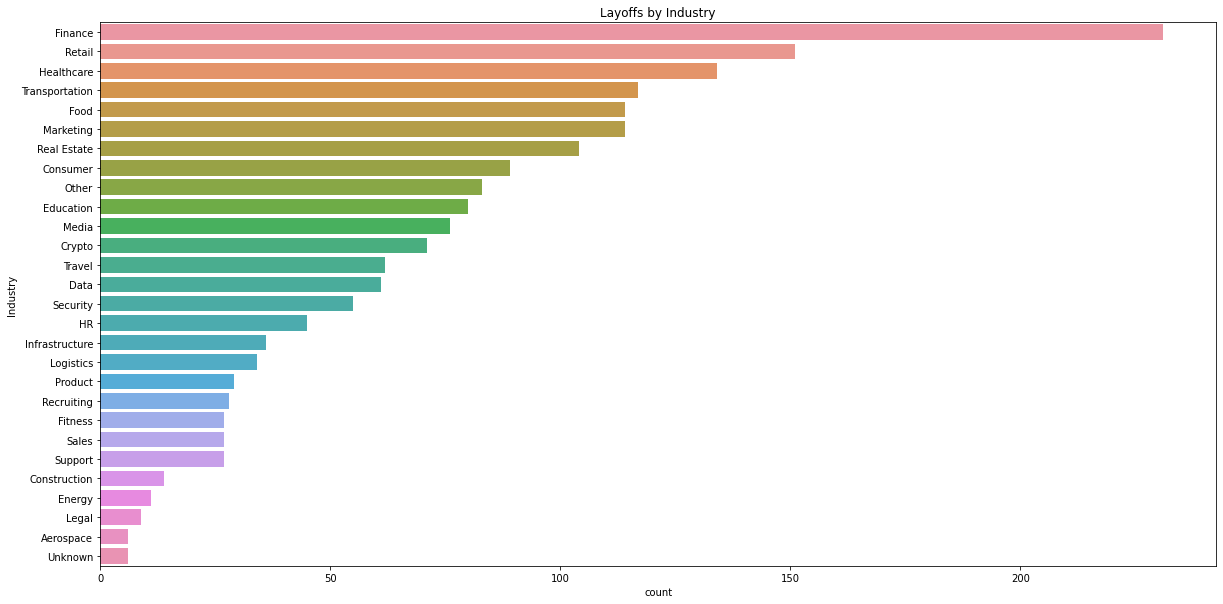

In [12]:
plt.figure(figsize=(20,10))
plt.title("Layoffs by Industry")
sns.countplot(y=df['Industry'],order=df.groupby(by='Industry').count().sort_values(by='Location',ascending=False).index)

In [13]:
df2 = df.groupby(by='Country').count().iloc[:,0]

In [14]:
df2.index

Index(['Argentina', 'Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Czech Republic',
       'Denmark', 'Egypt', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Hong Kong', 'Hungary', 'India', 'Indonesia', 'Ireland',
       'Israel', 'Kenya', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico',
       'Myanmar', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway',
       'Pakistan', 'Peru', 'Poland', 'Portugal', 'Romania', 'Russia',
       'Senegal', 'Seychelles', 'Singapore', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Thailand', 'Turkey', 'United Arab Emirates',
       'United Kingdom', 'United States', 'Uruguay', 'Vietnam'],
      dtype='object', name='Country')

In [15]:
df2 = pd.DataFrame(df2)

In [ ]:
import plotly.express as px
df = px.data.gapminder().query("year == 2007")
df2['Country'] = df2.index
iso_alpha = []
for name in df2.index:
    try:
        iso_alpha.append(df[df['country']==name].iloc[0,6])
    except:
        iso_alpha.append("")
        print(name)
#iso_alpha  = [ for name in df2.index]


Estonia
Hong Kong
Lithuania
Luxembourg
Russia
Seychelles
United Arab Emirates


In [ ]:
fig = px.scatter_geo(df2, locations=iso_alpha,
                     size=df2["Company"], # size of markers, "pop" is one of the columns of gapminder
                     )
fig.show()


In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
data = dict(type='choropleth',
            locations=df2.index,locationmode='country names',
            text=df2.index,
            z=df2['Company'],
            colorbar={'title':'Number of layoffs'})
choromap = go.Figure(data=[data])
iplot(choromap)

In [ ]:
pd.DataFrame(df.value_counts('Country')[:10],columns=[""]).style.set_caption("TOP 10 COUNTRIES WITH MOST LAYOFFS")

,
Country,
United States,1209
India,112
Canada,84
United Kingdom,58
Brazil,57
Germany,53
Israel,43
Australia,35
Singapore,28


In [ ]:
df.value_counts('Company')[:14]

Company
OYO           5
Uber          5
Loft          5
Vedantu       4
Latch         4
Shopify       4
Gopuff        4
Better.com    4
DataRobot     4
Patreon       4
Netflix       4
Truepill      4
WeWork        4
Swiggy        4
dtype: int64

<AxesSubplot: xlabel='count', ylabel='Stage'>

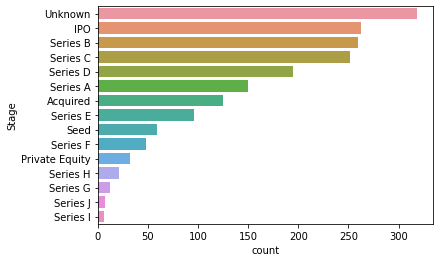

In [30]:
sns.countplot(y=df['Stage'],order=df.value_counts("Stage").sort_values(ascending=False).index)

In [16]:
df[(df['Industry'] == 'Data')]

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
7,Revelate,Montreal,Data,24.0,0.30,2022-12-16,https://betakit.com/layoffs-persist-at-canadia...,26.0,Series A,2022-12-19 17:17:13,Canada,Unknown
122,Elastic,SF Bay Area,Data,NaN,0.13,2022-11-30,https://www.elastic.co/blog/ceo-ash-kulkarni-e...,162.0,IPO,2022-12-01 06:23:46,United States,Unknown
204,UiPath,New York City,Data,241.0,0.06,2022-11-15,https://www.marketwatch.com/story/uipath-stock...,2000.0,IPO,2022-11-17 00:00:16,United States,Unknown
266,CloudFactory,Nairobi,Data,NaN,0.12,2022-11-09,https://time.com/6234014/tech-layoffs-twitter-...,78.0,Private Equity,2022-11-20 00:10:45,Kenya,Unknown
281,Domino Data Lab,SF Bay Area,Data,NaN,0.25,2022-11-07,https://docs.google.com/spreadsheets/d/1YKzaAk...,223.0,Series F,2022-11-08 21:56:41,United States,https://docs.google.com/spreadsheets/d/1YKzaAk...
...,...,...,...,...,...,...,...,...,...,...,...,...
1643,Mapbox,Washington D.C.,Data,NaN,NaN,2020-04-06,LinkedIn,227.0,Series C,2020-05-10 06:05:53,United States,Unknown
1665,Alegion,Austin,Data,NaN,NaN,2020-04-03,LinkedIn,16.0,Series A,2020-04-09 05:39:26,United States,Unknown
1758,DataRobot,Boston,Data,200.0,NaN,2020-03-27,https://www.americaninno.com/boston/inno-news-...,430.0,Series E,2020-03-28 20:52:49,United States,Unknown
1795,Element Analytics,SF Bay Area,Data,10.0,NaN,2020-03-25,Company executive,22.0,Series A,2020-04-18 18:20:15,United States,Unknown


In [18]:
df[(df['Industry'] == 'Finance')]

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
2,Briza,Toronto,Finance,26.0,0.40,2022-12-20,https://betakit.com/ceo-of-briza-steps-down-as...,10.0,Series A,2022-12-20 18:43:01,Canada,https://docs.google.com/spreadsheets/d/18ZMnL9...
6,Tomorrow,Hamburg,Finance,30.0,0.25,2022-12-16,https://www.businessinsider.de/gruenderszene/f...,29.0,Unknown,2022-12-18 04:15:07,Germany,https://docs.google.com/spreadsheets/d/187Gljr...
11,Modern Treasury,SF Bay Area,Finance,NaN,0.18,2022-12-16,Internal memo,183.0,Series C,2022-12-21 03:28:48,United States,Unknown
33,Autobooks,Detroit,Finance,NaN,NaN,2022-12-10,https://www.crainsdetroit.com/technology/finte...,97.0,Series C,2022-12-11 03:36:27,United States,Unknown
39,Primer,London,Finance,85.0,0.33,2022-12-09,https://techcrunch.com/2022/12/09/primer-the-u...,73.0,Series B,2022-12-09 16:37:23,United Kingdom,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
1739,PeerStreet,Los Angeles,Finance,51.0,0.30,2020-03-30,https://layoffs.fyi/2020/03/31/breaking-la-bas...,110.0,Series C,2020-03-31 21:41:47,United States,Unknown
1764,Mogo,Vancouver,Finance,78.0,0.30,2020-03-27,https://betakit.com/mogo-lays-off-30-percent-o...,201.0,IPO,2020-04-03 14:40:07,Canada,Unknown
1767,Bench,Vancouver,Finance,47.0,0.10,2020-03-27,https://betakit.com/bench-re-hires-workers-as-...,49.0,Series B,2020-06-23 01:22:09,Canada,Unknown
1774,Bcredi,Curitiba,Finance,NaN,NaN,2020-03-27,https://layoffs.fyi/list/bcredi/,NaN,Series A,2020-04-25 15:28:59,Brazil,Unknown


In [19]:
df['Stage'].unique()

array(['IPO', 'Series A', 'Series F', 'Series D', 'Unknown', 'Series B',
       'Series C', 'Series I', 'Series E', 'Acquired', 'Series H',
       'Private Equity', 'Series J', 'Seed', 'Series G'], dtype=object)

In [20]:
df[(df['Industry'] == 'Crypto')]

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
9,Autograph,Los Angeles,Crypto,NaN,NaN,2022-12-16,https://www.businessinsider.com/tom-brady-nft-...,205.0,Series B,2022-12-19 22:13:27,United States,Unknown
27,TaxBit,Salt Lake City,Crypto,NaN,NaN,2022-12-13,https://www.axios.com/local/salt-lake-city/202...,235.0,Series B,2022-12-18 04:07:43,United States,Unknown
43,Digital Surge,Brisbane,Crypto,NaN,1.00,2022-12-09,https://www.9news.com.au/technology/australian...,NaN,Unknown,2022-12-11 06:09:24,Australia,Unknown
45,ZenLedger,Seattle,Crypto,NaN,0.10,2022-12-09,https://blockworks.co/news/another-crypto-tax-...,25.0,Series B,2022-12-11 05:56:55,United States,Unknown
56,Bakkt,Atlanta,Crypto,NaN,0.15,2022-12-08,https://bakkt.com/newsroom/a-note-from-gavin-m...,932.0,IPO,2022-12-11 03:37:41,United States,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
1533,BitGo,SF Bay Area,Crypto,NaN,0.12,2020-04-17,https://www.theblockcrypto.com/post/62276/cryp...,69.0,Series B,2020-04-30 15:40:19,United States,Unknown
1544,Purse,SF Bay Area,Crypto,NaN,1.00,2020-04-16,https://www.coindesk.com/bitcoin-startup-purse...,1.0,Seed,2020-04-16 23:35:05,United States,Unknown
1593,CipherTrace,SF Bay Area,Crypto,NaN,NaN,2020-04-09,https://www.theblockcrypto.com/daily/61411/blo...,18.0,Unknown,2020-04-30 16:17:28,United States,Unknown
1594,Elliptic,London,Crypto,NaN,0.30,2020-04-09,https://www.theblockcrypto.com/daily/61411/blo...,40.0,Series B,2020-04-30 16:16:50,United Kingdom,Unknown


In [21]:
df[(df['Industry'] == 'Data') | (df['Industry'] == 'Crypto') | (df['Industry'] == 'Finance')]

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
2,Briza,Toronto,Finance,26.0,0.40,2022-12-20,https://betakit.com/ceo-of-briza-steps-down-as...,10.0,Series A,2022-12-20 18:43:01,Canada,https://docs.google.com/spreadsheets/d/18ZMnL9...
6,Tomorrow,Hamburg,Finance,30.0,0.25,2022-12-16,https://www.businessinsider.de/gruenderszene/f...,29.0,Unknown,2022-12-18 04:15:07,Germany,https://docs.google.com/spreadsheets/d/187Gljr...
7,Revelate,Montreal,Data,24.0,0.30,2022-12-16,https://betakit.com/layoffs-persist-at-canadia...,26.0,Series A,2022-12-19 17:17:13,Canada,Unknown
9,Autograph,Los Angeles,Crypto,NaN,NaN,2022-12-16,https://www.businessinsider.com/tom-brady-nft-...,205.0,Series B,2022-12-19 22:13:27,United States,Unknown
11,Modern Treasury,SF Bay Area,Finance,NaN,0.18,2022-12-16,Internal memo,183.0,Series C,2022-12-21 03:28:48,United States,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
1767,Bench,Vancouver,Finance,47.0,0.10,2020-03-27,https://betakit.com/bench-re-hires-workers-as-...,49.0,Series B,2020-06-23 01:22:09,Canada,Unknown
1774,Bcredi,Curitiba,Finance,NaN,NaN,2020-03-27,https://layoffs.fyi/list/bcredi/,NaN,Series A,2020-04-25 15:28:59,Brazil,Unknown
1795,Element Analytics,SF Bay Area,Data,10.0,NaN,2020-03-25,Company executive,22.0,Series A,2020-04-18 18:20:15,United States,Unknown
1813,GrayMeta,Los Angeles,Data,20.0,0.40,2020-03-23,LinkedIn,7.0,Unknown,2020-04-01 05:31:34,United States,Unknown
